In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import r2_score, mean_squared_error,classification_report, confusion_matrix

Importar datos

In [4]:
r="winequality-red.csv"
datos=pd.read_csv(r,sep=";")

Crear los datos de entrenamiento y prueba

In [5]:
X=datos.drop(["alcohol","quality"],axis=1).values
y=datos["alcohol"].values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,
                                               random_state=123)

Normalización de los datos. Definición de variables a predecir y predictoras

In [6]:
# Se toma la media de los valores de entrenamiento
scaler= preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

#Adicionar una columa de 1 para B0
X_test_scaled= np.insert(X_test_scaled,0,1,axis=1) 
X_train_scaled= np.insert(X_train_scaled,0,1,axis=1)

n=len(X_train_scaled[0]) # Número de variables

# Genearación de betas iniciales
B=np.zeros(n)
alpha=0.0005                             # Tasa de aprendizaje
X_train_scaled.shape

(1279, 11)

Definición de la función costo y gradiente

In [7]:
# Función costo
def costo(X,Y,B):
    m=len(Y)
    J=np.sum((X.dot(B)-Y)**2)/(2*m)
    return J

# Gradiente
def grad(X,Y,B,alpha,iterations):
    cost_hist=[0]*iterations
    m=len(Y)
    for i in range(iterations):
        h=X.dot(B)
        loss= h-Y
        gradient= X.T.dot(loss)/m
        B=B-alpha*gradient
        cost=costo(X,Y,B)
        cost_hist[i]=cost
    return B, cost_hist, loss

Estimación de los coeficientes de regresión

In [8]:
Betas, cost_hist, loss= grad(X_train_scaled,y_train,B,alpha,10000)
for i in range(len(Betas)):
    print("Beta %s :"%(i), Betas[i])
print("Costo en la última iteración:","%.4f"%cost_hist[-1])

Beta 0 : 10.3356303204
Beta 1 : 0.354348532553
Beta 2 : 0.0189236064704
Beta 3 : 0.273994141044
Beta 4 : 0.283042387644
Beta 5 : -0.178484660219
Beta 6 : 0.0144390042865
Beta 7 : -0.182794900063
Beta 8 : -0.788078097422
Beta 9 : 0.30350041734
Beta 10 : 0.20691872462
Costo en la última iteración: 0.2208


Pronóstico con los valores de prueba

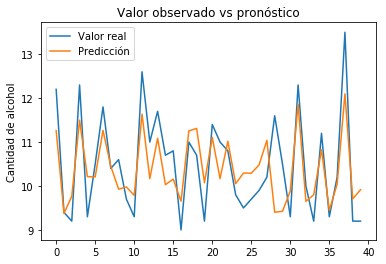

In [9]:
# Predicción con los valores de prueba

pronostico = []
for i in X_test_scaled:
    val = np.sum(i*Betas)
    pronostico.append(val)

plt.plot(y_test[:40], label='Valor real')
plt.plot(pronostico[:40], label='Predicción')
plt.title("Valor observado vs pronóstico")
plt.ylabel('Cantidad de alcohol')
plt.legend(loc=2)
plt.savefig("Regresion_lineal")
plt.show()

In [24]:
y1=y_test.tolist()
Coef=r2_score(y1,pronostico)*100
print(" El coeficiente de determinación (R^2) es: %.2f "%Coef + "%")

 El coeficiente de determinación (R^2) es: 55.28 %


El menor costo es: 0.220758967311


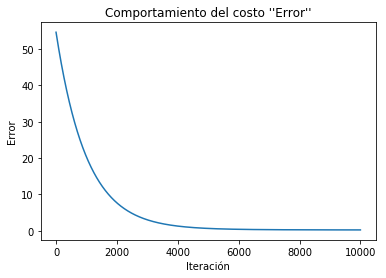

In [10]:
minMse=min(cost_hist)
print("El menor costo es: %s" %(minMse))

xaxis=range(len(cost_hist))
plt.plot(xaxis,cost_hist)

plt.title("Comportamiento del costo ''Error''")
plt.xlabel("Iteración")
plt.ylabel("Error")
plt.savefig("Costo_error")
plt.show()